# MMETSP transcriptome assembly metrics

In [14]:
special_flowers = c('MMETSP0693', 'MMETSP1019', 'MMETSP0923', 'MMETSP0008', 'MMETSP1002', 'MMETSP1325', 'MMETSP1018', 
                   'MMETSP1346', 'MMETSP0088', 'MMETSP0092', 'MMETSP0717', 'MMETSP0223', 'MMETSP0115', 'MMETSP0196', 
                   'MMETSP0197', 'MMETSP0398', 'MMETSP0399', 'MMETSP0922')

In [71]:
# metrics files
#dib_v_ncgr <- read.csv("../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.cds.csv")
#ncgr_v_dib <- read.csv("../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv")
#score_ncgr <- read.csv("../assembly_evaluation_data/transrate_scores_imicrobe_cds.csv")
#score_dib <- read.csv("../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv")
#BUSCO_dib_data <- read.csv("../assembly_evaluation_data/busco_scores_MMETSP_protist_trinity2.2.0.csv")
#BUSCO_ncgr_data <- read.csv("../assembly_evaluation_data/busco_scores_imicrobe_protist.csv")
giant_matrix = "../assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv"
all_metrics = read.csv(giant_matrix)
#all_metrics.columns.values
# transrate score metrics

#BUSCO_dib_data
#BUSCO_ncgr_data

all_metrics <- all_metrics[!all_metrics$SampleName %in% special_flowers,]
score_ncgr_cds <- all_metrics[,c('SampleName', 'score.y')]
score_ncgr_nt <- all_metrics[,c('SampleName','score.x')]
score_dib  <- all_metrics[,c('SampleName','score')]
colnames(score_ncgr_nt) <- c('SampleName','score')
colnames(score_ncgr_cds) <- c('SampleName','score')
#transrate reference metrics
ncgr_v_dib <- all_metrics[,c('SampleName','p_refs_with_CRBB.y','n_seqs.x','mean_orf_percent.x')]
dib_v_ncgr <- all_metrics[,c('SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent')]
colnames(ncgr_v_dib) <- c('SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent')
# BUSCO eukaryotic
BUSCO_ncgr_data <- all_metrics[,c('SampleName','Complete_eukaryotic_BUSCO_prop.y')]
colnames(BUSCO_ncgr_data) <- c('SampleName','Complete_eukaryotic_BUSCO_prop')
BUSCO_ncgr_data <- na.omit(BUSCO_ncgr_data)
BUSCO_dib_data <- all_metrics[,c('SampleName','Complete_eukaryotic_BUSCO_prop.x')]
colnames(BUSCO_dib_data) <- c('SampleName','Complete_eukaryotic_BUSCO_prop')
BUSCO_dib_data <- na.omit(BUSCO_dib_data)
# BUSCO protist
BUSCO_ncgr_data_prot <- all_metrics[,c('SampleName','Complete_protist_BUSCO_prop.y')]
colnames(BUSCO_ncgr_data_prot) <- c('SampleName','Complete_protist_BUSCO_prop')
BUSCO_ncgr_data_prot <- na.omit(BUSCO_ncgr_data_prot)
BUSCO_dib_data_prot <- all_metrics[,c('SampleName','Complete_protist_BUSCO_prop.x')]
colnames(BUSCO_dib_data_prot) <- c('SampleName','Complete_protist_BUSCO_prop')
BUSCO_dib_data_prot <- na.omit(BUSCO_dib_data_prot)

## 1. Size of table with [Transrate](http://hibberdlab.com/transrate/metrics.html) comparative metrics

(comparing DIB re-assemblies to NCGR assemblies and vice versa)

### dib_v_ncgr (rows x columns)

In [72]:
dim(dib_v_ncgr)

[1] 660   4

### ncgr_v_dib (rows x columns)

In [73]:

dim(ncgr_v_dib)

[1] 660   4

## Size of table with [Transrate](http://hibberdlab.com/transrate/metrics.html) score  metrics  

#### NCGR, "cds"

In [74]:
dim(score_ncgr_cds)

[1] 660   2

#### NCGR, "nt" 

In [75]:
dim(score_ncgr_nt)

[1] 660   2

#### DIB


In [76]:
dim(score_dib)

[1] 660   2

## 2. Number of contigs in transcriptome (mean ± std)

### DIB re-assemblies

In [77]:
contigs_dib_v_ncgr <- dib_v_ncgr$n_seqs

#length(contigs_dib_v_ncgr)

mean(contigs_dib_v_ncgr,na.rm=TRUE)

sd(contigs_dib_v_ncgr,na.rm=TRUE)


[1] 48361.35

[1] 35703.53

### NCGR assemblies from [imicrobe](https://imicrobe.us/?#/projects/104)

In [78]:
contigs_ncgr_v_dib <- ncgr_v_dib$n_seqs
#length(contigs_ncgr_v_dib)
mean(contigs_ncgr_v_dib,na.rm=TRUE)
sd(contigs_ncgr_v_dib,na.rm=TRUE)

[1] 30532.61

[1] 21353.38

### Kolmogorov–Smirnov test comparing distributions of DIB vs. NCGR num contigs

In [79]:
ks.test(contigs_dib_v_ncgr,contigs_ncgr_v_dib)

Warning message in ks.test(contigs_dib_v_ncgr, contigs_ncgr_v_dib):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  contigs_dib_v_ncgr and contigs_ncgr_v_dib
D = 0.35715, p-value < 2.2e-16
alternative hypothesis: two-sided


## 3. [BUSCO](http://busco.ezlab.org/v2/) v2 content, [Protists database](http://busco.ezlab.org/frame_protists.html)

### DIB (mean ± std)

In [80]:
BUSCO_dib_prot <- BUSCO_dib_data_prot$Complete_protist_BUSCO_prop
#length(BUSCO_dib)
mean(BUSCO_dib_prot,na.rm=TRUE)
sd(BUSCO_dib_prot,na.rm=TRUE)

[1] 0.6318357

[1] 0.1809956

#### NCGR (mean ± std)

In [81]:
BUSCO_ncgr_prot <- BUSCO_ncgr_data_prot$Complete_protist_BUSCO_prop
#length(BUSCO_ncgr)
mean(BUSCO_ncgr_prot,na.rm=TRUE)
sd(BUSCO_ncgr_prot,na.rm=TRUE)

[1] 0.6126411

[1] 0.1817242

### Kolmogorov–Smirnov test comparing BUSCO content distributions DIB vs. NCGR

In [82]:
ks.test(BUSCO_dib_prot,BUSCO_ncgr_prot)

Warning message in ks.test(BUSCO_dib_prot, BUSCO_ncgr_prot):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  BUSCO_dib_prot and BUSCO_ncgr_prot
D = 0.066309, p-value = 0.1166
alternative hypothesis: two-sided


## [BUSCO](http://busco.ezlab.org/v2/) v2 content, [Eukaryotic database](http://busco.ezlab.org/frame_euka.html)

#### DIB (mean ± std)

In [83]:
BUSCO_dib <- BUSCO_dib_data$Complete_eukaryotic_BUSCO_prop
#length(BUSCO_dib)
mean(BUSCO_dib,na.rm=TRUE)
sd(BUSCO_dib,na.rm=TRUE)

[1] 0.6302677

[1] 0.1858271

#### NCGR (mean ± std)

In [84]:
BUSCO_ncgr <- BUSCO_ncgr_data$Complete_eukaryotic_BUSCO_prop
#length(BUSCO_ncgr)
mean(BUSCO_ncgr,na.rm=TRUE)
sd(BUSCO_ncgr,na.rm=TRUE)

[1] 0.6126411

[1] 0.1817242

#### Kolmogorov–Smirnov test comparing BUSCO content distributions DIB vs. NCGR

In [85]:
ks.test(BUSCO_dib,BUSCO_ncgr)

Warning message in ks.test(BUSCO_dib, BUSCO_ncgr):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  BUSCO_dib and BUSCO_ncgr
D = 0.06467, p-value = 0.134
alternative hypothesis: two-sided


## 4. [Transrate score](http://hibberdlab.com/transrate/metrics.html)

### DIB (mean ± std)

In [203]:
transrate_score_dib <- score_dib$score
#length(transrate_score_dib)
mean(transrate_score_dib)
sd(transrate_score_dib)

[1] 0.3115697

[1] 0.09940476

### NCGR (mean ± std)

In [204]:
transrate_score_ncgr <- score_ncgr$score
#length(transrate_score_ncgr)
mean(transrate_score_ncgr)
sd(transrate_score_ncgr)

[1] 0.2223661

[1] 0.08733533

### Kolmogorov–Smirnov test for Transrate score

In [205]:
ks.test(transrate_score_dib,transrate_score_ncgr)

Warning message in ks.test(transrate_score_dib, transrate_score_ncgr):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  transrate_score_dib and transrate_score_ncgr
D = 0.48827, p-value < 2.2e-16
alternative hypothesis: two-sided


## 5. Conditional Recriprocal Best Blast (CRBB) (described in [Aubry et al. 2014](http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1004365))

### DIB (mean ± std)

In [206]:
CRBB_dib_v_ncgr <- dib_v_ncgr$p_refs_with_CRBB
#length(CRBB_dib_v_ncgr)
mean(CRBB_dib_v_ncgr)
sd(CRBB_dib_v_ncgr)

[1] 0.7019252

[1] 0.2751694

### NCGR (mean ± std)

In [207]:
CRBB_ncgr_v_dib <- ncgr_v_dib$p_refs_with_CRBB
#length(CRBB_ncgr_v_dib)
mean(CRBB_ncgr_v_dib)
sd(CRBB_ncgr_v_dib)

[1] 0.48773

[1] 0.08877601

### Kolmogorov–Smirnov test for Transrate score

In [208]:
ks.test(CRBB_dib_v_ncgr,CRBB_ncgr_v_dib)

Warning message in ks.test(CRBB_dib_v_ncgr, CRBB_ncgr_v_dib):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  CRBB_dib_v_ncgr and CRBB_ncgr_v_dib
D = 0.7616, p-value < 2.2e-16
alternative hypothesis: two-sided


## 6. Open Reading Frame (ORF) content

[According to the Transrate documentation](https://github.com/blahah/transrate/blob/cc873b8247165d1651b60dde5eab51fc55170f02/ext/transrate/transrate.c): An ORF is defined as the number of bases between either the start of the sequence or a start codon and either the end of the sequence or a stop codon

### DIB (mean ± std)

In [209]:
ORF_dib <- dib_v_ncgr$mean_orf_percent
#length(ORF_dib)
mean(ORF_dib)
sd(ORF_dib)

[1] 81.90496

[1] 9.677854

### NCGR (mean ± std)

In [210]:
ORF_ncgr <- ncgr_v_dib$mean_orf_percent
#length(ORF_ncgr)
mean(ORF_ncgr)
sd(ORF_ncgr)

[1] 76.78657

[1] 10.17419

### Kolmogorov–Smirnov test for ORF

In [211]:
ks.test(ORF_dib,ORF_ncgr)

Warning message in ks.test(ORF_dib, ORF_ncgr):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  ORF_dib and ORF_ncgr
D = 0.27863, p-value < 2.2e-16
alternative hypothesis: two-sided


# Combine assembly metrics and visualize with PCA

[1] "SampleName"                     "Phylum"                        
 [3] "n_seqs.x"                       "largest.x"                     
 [5] "n_bases.x"                      "mean_len.x"                    
 [7] "n_under_200.x"                  "n_over_1k.x"                   
 [9] "n_over_10k.x"                   "n_with_orf.x"                  
[11] "gc.x"                           "gc_skew.x"                     
[13] "cpg_ratio.x"                    "linguistic_complexity.x"       
[15] "fragments"                      "fragments_mapped"              
[17] "p_fragments_mapped"             "good_mappings"                 
[19] "p_good_mapping"                 "bad_mappings"                  
[21] "potential_bridges"              "bases_uncovered"               
[23] "p_bases_uncovered"              "contigs_uncovbase"             
[25] "p_contigs_uncovbase"            "contigs_uncovered"             
[27] "p_contigs_uncovered"            "contigs_lowcovered"            
[29] "p_contigs_lowcovered"           "contigs_segmented"             
[31] "p_contigs_segmented"            "score.x"                       
[33] "optimal_score.x"                "cutoff.x"                      
[35] "n_seqs.y"                       "CRBB_hits"                     
[37] "n_contigs_with_CRBB"            "p_contigs_with_CRBB"           
[39] "rbh_per_reference"              "n_refs_with_CRBB"              
[41] "p_refs_with_CRBB"               "cov25"                         
[43] "p_cov25"                        "cov50"                         
[45] "p_cov50"                        "cov75"                         
[47] "p_cov75"                        "cov85"                         
[49] "p_cov85"                        "cov95"                         
[51] "p_cov95"                        "reference_coverage"            
[53] "Complete_eukaryotic"            "Fragmented_eukaryotic"         
[55] "Missing_eukaryotic"             "Total_eukaryotic"              
[57] "Complete_eukaryotic_BUSCO_perc" "Complete_protist"              
[59] "Fragmented_protist"             "Missing_protist"               
[61] "Total_protist"                  "Complete_protist_BUSCO_perc"   
[63] "Unique_kmers"                   "num_reads_kept_diginorm"       
[65] "total_reads_before_diginorm"    "num_kmers_reads_diginorm"

,n_seqs.x,largest.x,n_bases.x,mean_len.x,n_under_200.x,n_over_1k.x,n_over_10k.x,n_with_orf.x,gc.x,gc_skew.x,⋯,Complete_eukaryotic_BUSCO_perc,Complete_protist,Fragmented_protist,Missing_protist,Total_protist,Complete_protist_BUSCO_perc,Unique_kmers,num_reads_kept_diginorm,total_reads_before_diginorm,num_kmers_reads_diginorm
MMETSP0004,33559,17276,27919170,831.94285,0,9448,3,16820,0.47964,0.01147,⋯,0.693069306931,168,31,35,234,0.717948717948718,19837761,16287761,49504503,68379508
MMETSP0005,32824,11058,27684811,843.43197,0,9573,2,16407,0.478,0.01152,⋯,0.673267326733,161,33,40,234,0.688034188034188,20350054,17691329,56153336,79131023
MMETSP0006,47463,15370,33886777,713.96197,0,10216,2,20242,0.58919,0.01182,⋯,0.557755775578,151,40,43,234,0.645299145299145,25286098,18575869,42843795,93740474
MMETSP0007,30922,6567,16617786,537.40981,0,3245,0,7980,0.56437,0.00932,⋯,0.303630363036,93,27,114,234,0.397435897435897,12496793,12104182,40343316,65289000
MMETSP0010,43375,13866,52360772,1207.16477,0,20418,25,25589,0.45756,0.00607,⋯,0.73597359736,176,32,26,234,0.752136752136752,24840436,6857204,23018992,93465267
MMETSP0013,38251,17601,48371657,1264.58542,0,17110,24,23110,0.45474,0.00815,⋯,0.838283828383,217,10,7,234,0.927350427350427,33217106,10050139,36527735,128035793


[1] 493  64

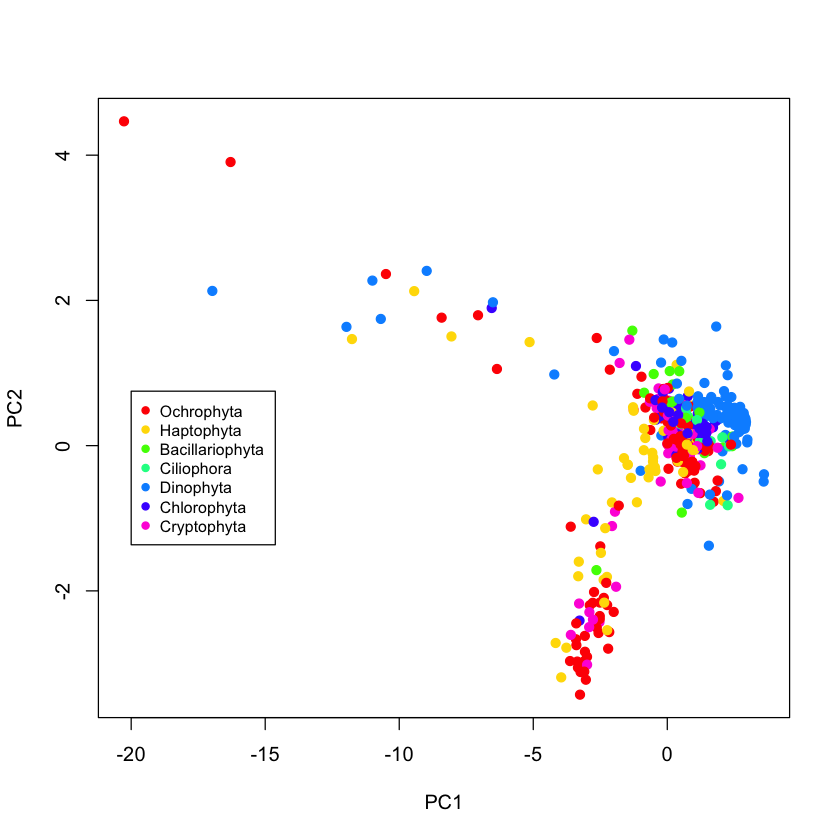

In [6]:
tax_raw <- read.csv("~/Documents/UCDavis/dib/MMETSP/git/MMETSP/assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv")
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018","MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196","MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")
tax_raw <- tax_raw[!tax_raw$SampleName %in% special_flowers,]
#colnames(tax_raw)
# combine assembly metrics
x<-tax_raw[,c(2,34,45,47,48,49,50,51,52,53,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77:84,86:116,118)]
#dim(x)
# only top 7 taxa
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
sub<-x[x$Phylum %in% sub_phy,]
sub$Phylum <- factor(sub$Phylum)
#dim(sub)
#length(levels(sub$Phylum))
# These are the assembly metrics used to generate the PCA
colnames(sub)
rownames(sub)<-sub$SampleName
sub<-na.omit(sub)
x<-sub[,c(3:66)]
x<-as.matrix(x)
head(x)
x_plus<- x + 1
x_log <-log10(x_plus)
#dim(x_log)
x_log <- na.omit(x_log)
dim(x_log)
pca = prcomp(x_log)
names = rownames(x)
fac= names
plot(pca$x[,1:2], col=Cols(sub$Phylum), pch=19,
     xlab="PC1",ylab="PC2")
legend(-20,0.75,legend=unique(as.character(sub$Phylum)),col=rainbow(length(unique(sub$Phylum))),cex=0.8, pch=19)